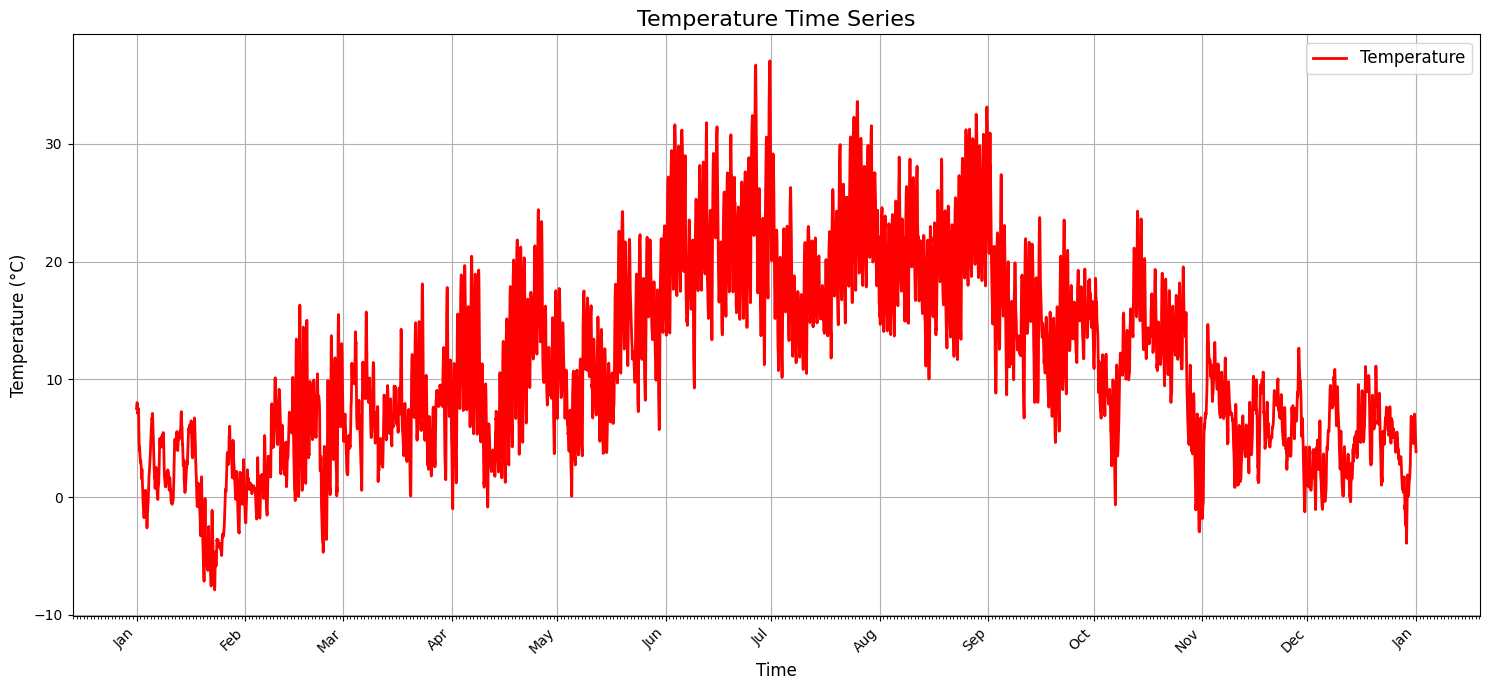

In [44]:
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from BA import wind_series_for_pypsa, temperature_series

directory_path = '/Users/tomkaehler/Documents/Uni/BA/png'


fig, ax = plt.subplots(figsize=(15, 7))  

# Plotting the temperature series
ax.plot(temperature_series.index, temperature_series.values, color='red', label='Temperature', linewidth=2)

# Setting the major locator for the x-axis to be each month
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Setting the major formatter for the x-axis to show the month as 'Jan', 'Feb', etc.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Optionally, you can include minor ticks to represent individual days
ax.xaxis.set_minor_locator(mdates.DayLocator())

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adding grid lines for better readability
ax.grid(True)

# Setting the labels with font size
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)  # Assuming the unit is Celsius

# Setting the plot title with font size
ax.set_title('Temperature Time Series', fontsize=16)

# Adding the legend with font size
ax.legend(fontsize=12)


# Improving layout to ensure labels and titles are fit into the plot area
plt.tight_layout()

# Saving the figure to a file
plt.savefig(os.path.join(directory_path, 'temperature_time_series.png'), dpi=300)

# Show the plot
plt.show()

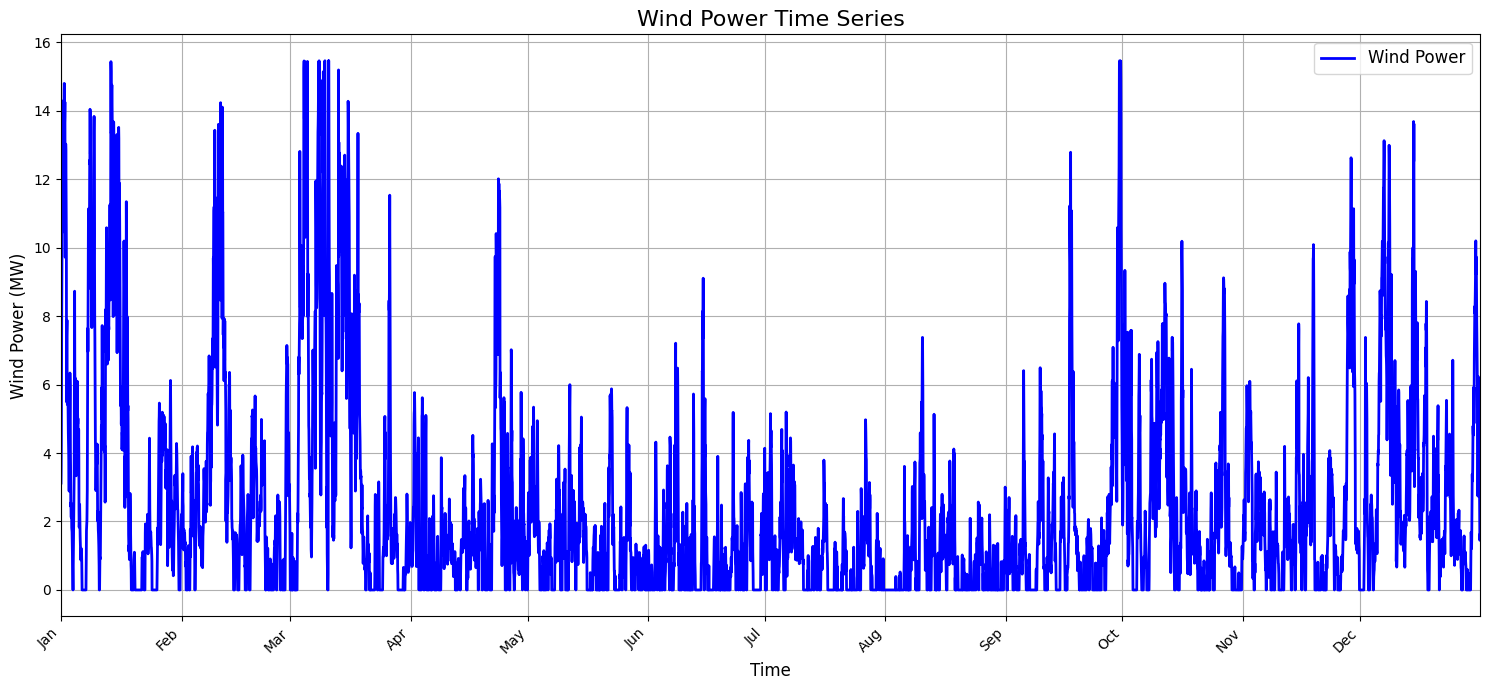

In [45]:
fig, ax = plt.subplots(figsize=(15, 7))

# Plotting the wind power series
ax.plot(wind_series_for_pypsa.index, wind_series_for_pypsa.values, color='blue', label='Wind Power', linewidth=2)

# Set the major locator for the x-axis to be each month and the formatter to show the month as 'Jan', 'Feb', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# To leave the last 'Jan' off the x-axis, we will set the limits for the x-axis manually
# Assuming your series is sorted in time, the first and last indices can be used to set the limits
ax.set_xlim(wind_series_for_pypsa.index[0], wind_series_for_pypsa.index[-1])

# Rotate date labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Adding grid lines for better readability
ax.grid(True)

# Setting the labels with font size
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Wind Power (MW)', fontsize=12)  # Adjust the unit if needed

# Setting the plot title with font size
ax.set_title('Wind Power Time Series', fontsize=16)

# Adding the legend with font size
ax.legend(fontsize=12)

# Improving layout to ensure labels and titles are fit into the plot area
plt.tight_layout()

# Save the figure to the 'png' folder within 'BA/results'
# Ensure this directory exists or create it using os.makedirs() as shown earlier
plt.savefig(os.path.join(directory_path, 'wind_power_time_series.png'), dpi=300)

# Show the plot
plt.show()

/var/folders/bx/h0xh5td55sd2qxnxdbr93_5r0000gp/T/ipykernel_77554/2379650590.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  links_p0 = pd.read_csv('results/links-p0.csv', index_col=0, parse_dates=True)
/var/folders/bx/h0xh5td55sd2qxnxdbr93_5r0000gp/T/ipykernel_77554/2379650590.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  links_p1 = pd.read_csv('results/links-p1.csv', index_col=0, parse_dates=True)


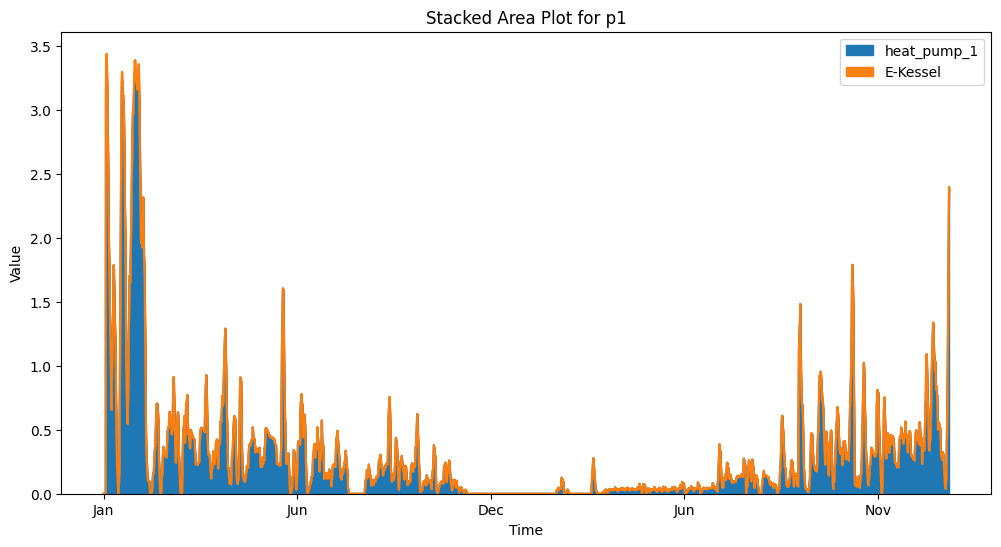

In [46]:
links_p0 = pd.read_csv('results/links-p0.csv', index_col=0, parse_dates=True)
links_p1 = pd.read_csv('results/links-p1.csv', index_col=0, parse_dates=True)

links_p1 = links_p1.abs()
links_p1_smoothed = links_p1.rolling(window=24).mean()


# Ensure that the DataFrame is filled after smoothing to avoid NaNs
# links_p1_smoothed = links_p1_smoothed.fillna(method='bfill')

sorted_columns = sorted(links_p1_smoothed.columns, key=lambda x: ('Heat pump' in x, 'E-Kessel' in x))
links_p1_sorted = links_p1[sorted_columns]

# Plotting the stacked area chart
ax = links_p1_smoothed.plot(kind='area', stacked=True, figsize=(12, 6))

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Stacked Area Plot for p1')

# To make the plot smoother, you might want to reduce the x-ticks frequency or format them
# For instance, if you have a DateTimeIndex, you can format the x-axis to show fewer dates
# ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.savefig(os.path.join(directory_path, 'Links-p1'), dpi=300)

# Show the plot
plt.show()



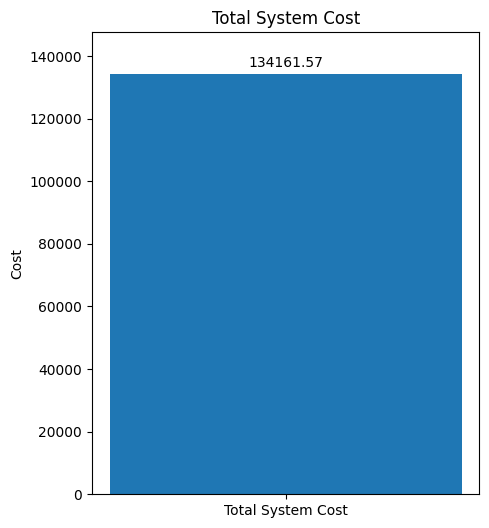

In [49]:
total_system_cost = n.objective

# Costs by component can be accessed from the respective component attributes
generator_costs = n.generators['capital_cost'] * n.generators['p_nom_opt']

# Assuming total_system_cost is a float representing the total cost
total_cost_data = {'Total System Cost': total_system_cost}

# Create a single bar plot
fig, ax = plt.subplots(figsize=(5, 6))  # Smaller figure size for a single bar
ax.bar(total_cost_data.keys(), total_cost_data.values())

# Add a text label above the bar with the cost
for i, v in enumerate(total_cost_data.values()):
    ax.text(i, v + min(total_cost_data.values())*0.01, "{:.2f}".format(v), ha='center', va='bottom')

plt.title('Total System Cost')
plt.ylabel('Cost')
plt.ylim(0, total_system_cost + total_system_cost*0.1)  # Set y-axis limit to show the text properly
plt.show()